<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Lecture_7_Linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных



In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()

print(iris_data.keys())
print(iris_data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

## Разделение данных


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Обучение моделей



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logistic_regression_model = LogisticRegression()
svm_model = SVC()

logistic_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

## Оценка моделей




In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=iris_data.target_names))

print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=iris_data.target_names))

Logistic Regression Performance:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM Performance:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


## Визуализация



In [ ]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=iris_data.feature_names)
results_df = X_test_df.copy()
results_df['true_target'] = y_test
results_df['pred_lr'] = y_pred_lr
results_df['pred_svm'] = y_pred_svm
results_df['true_class'] = results_df['true_target'].apply(lambda x: iris_data.target_names[x])
results_df['pred_lr_class'] = results_df['pred_lr'].apply(lambda x: iris_data.target_names[x])
results_df['pred_svm_class'] = results_df['pred_svm'].apply(lambda x: iris_data.target_names[x])

display(results_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true_target,pred_lr,pred_svm,true_class,pred_lr_class,pred_svm_class
0,6.1,2.8,4.7,1.2,1,1,1,versicolor,versicolor,versicolor
1,5.7,3.8,1.7,0.3,0,0,0,setosa,setosa,setosa
2,7.7,2.6,6.9,2.3,2,2,2,virginica,virginica,virginica
3,6.0,2.9,4.5,1.5,1,1,1,versicolor,versicolor,versicolor
4,6.8,2.8,4.8,1.4,1,1,1,versicolor,versicolor,versicolor


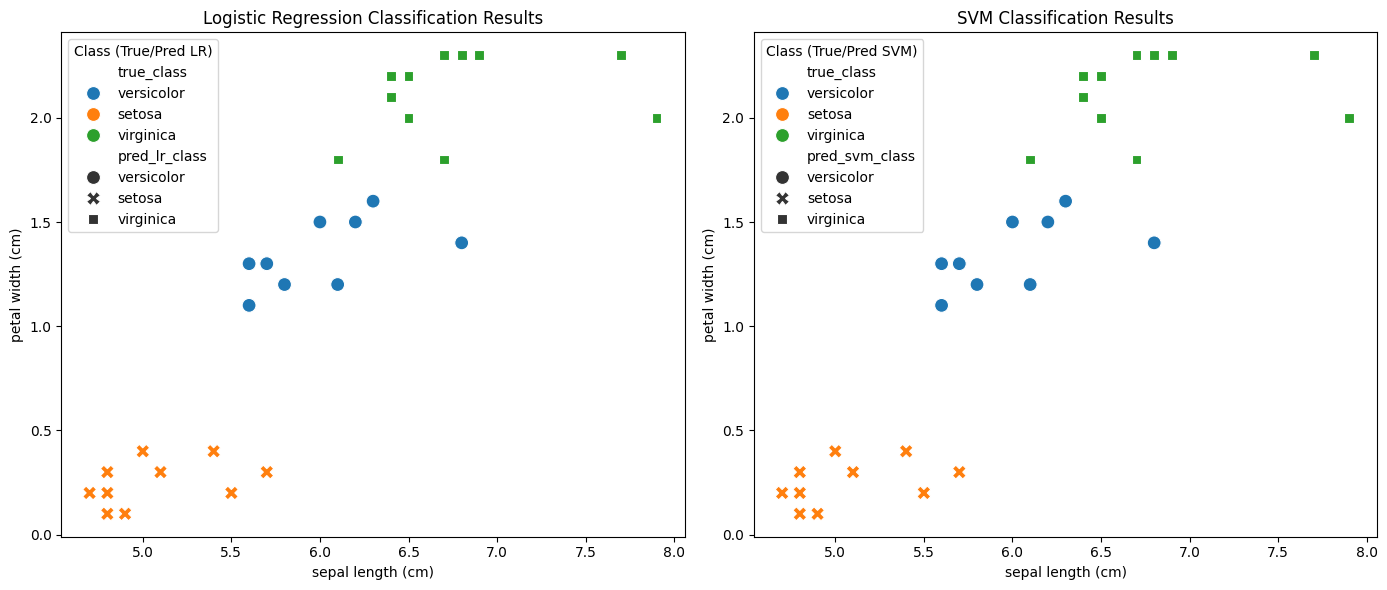

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'sepal length (cm)'
feature2 = 'petal width (cm)'

plt.figure(figsize=(14, 6))

# Logistic Regression Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=results_df, x=feature1, y=feature2, hue='true_class', style='pred_lr_class', s=100)
plt.title('Logistic Regression Classification Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Class (True/Pred LR)')

# SVM Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=results_df, x=feature1, y=feature2, hue='true_class', style='pred_svm_class', s=100)
plt.title('SVM Classification Results')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Class (True/Pred SVM)')

plt.tight_layout()
plt.show()